# kNN classifier Assignment
Assignment instructions: https://github.com/vesavvo/dkko/blob/main/assignments/Assignment_kNN_classifier.md

## 1. Business Understanding

The goal of this analysis is to use k-Nearest Neighbors (kNN) algorithm to create a model that can identify whether a tumor is malignant or benign. The model will be trained and tested using the Breast Cancer Wisconsin Diagnostic dataset from UCI Machine Learning Repository. The expected outcome is an kNN classifier model which can assist in the diagnosis of breast cancer from the features calculated from the images of fine needle aspirates (FNAs) of breast masses. The model´s performance will be evaluated based on its accuracy, precision and recall as well as a confusion matrix. The accuracy of the model is important as misclassifying a malignant tumor as benign would be a grave mistake in a medical application causing potential harm to the patient. There are no specific constraints for this analysis other than the size of the dataset and the fact that there is only one dataset, but it will suffice for the purpose of this assignment. For real use some further testing and validation of the model would be required.

## 2. Data Preparation

The dataset is fetched from UCI Machine Learning Repository using ucimlrepo package (documentation: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic). The data is processed images of fine needle aspirates (FNAs) of breast mass to predict whether the tumor is benign or malignant. According to the datasets introductory paper the variables are modelled so that larger values of features will indicate a higher likelihood of malignancy (article: https://www.semanticscholar.org/paper/Nuclear-feature-extraction-for-breast-tumor-Street-Wolberg/53f0fbb425bc14468eb3bf96b2e1d41ba8087f36). According to the documentationt the dataset does not include missing values, outliers or nonsensical values.


**The feature variables** are:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension (coastline approximation complexity)

For each of these features, three values are reported: the mean, standard deviation and largest (mean of the three largest values). In the dataset these are identified with suffixes 1, 2 and 3. Each row in the dataset corresponds to the FNA of one image and the **target variable** is "Diagnosis" (M = malignant, B = benign). 

Among imports in the code cells below are the necessary packages for data fetching, preprocessing, model building and evaluation. This analysis uses pandas for data frames, scikit-learn for preprocessing, model building and evaluation. 

Imports and data fetching are in the code cell below.


In [65]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.original
X
  


,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [66]:
benign_cases = X['Diagnosis'].value_counts()['B']
malignant_cases = X['Diagnosis'].value_counts()['M']
print(f'Number of benign cases: {benign_cases}')
print(f'Number of malignant cases: {malignant_cases}')


Number of benign cases: 357
Number of malignant cases: 212


The dataset contains 569 samples with 30 features as explained above. The dataset has 357 benign cases and 212 malignant cases. As benign tumors are more common in this dataset, it makes extra important to evaluate the model using metrics that take the class imbalance into account. Such metrics are accuracy, precision and recall. 


## 3. Data Preparation

The dataset is **ready to use** for modeling and does not for example require cleaning of missing values. There should not be any outliers in the data as the features are calculated from images and represent physical characteristics of the tumors. 

In order to be able to use the kNN algorithm, the target variable ("Diagnosis") should be separated from the input variables (features).  At the same time the ID column is dropped as it should not be included in the analysis. 

kNN uses Euclidean distance to measure the distance between data points and the data includes features with different scales (e.g., area with values possibly in the thousands and smoothness with values between 0 and 1) making it necessary to **standardize** the features before applying kNN.  The standardization is done by using StandardScaler from sklearn.preprocessing module. The fit_transform method scales all features so that the Euclidean distance is no longer dominated by features with larger scales (like area).

In [67]:
# Splitting target variable and features, dropping ID column
y = X['Diagnosis']
X = X.drop(columns=['Diagnosis', 'ID'])

# Standardization
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## 4. Modeling

After the data is standardized, the data is split into the training and test set (hold-out validation technique) using train_test_split function from sklearn.model_selection module. The test set size is set to 30 % of the whole dataset and random_state is set to 123 to ensure reproducibility of the results. random_state parameter makes sure that the same random split is obtained each time the code is run.

KNeighborsClassifier from sklearn.neighbors module is used to create the kNN classifier model. The training data is used to fit the model using the fit method and the test data is used to evaluate the model performance. To evaluate the performance of the model, several k-values are tested (1, 3, 5 and 7). The accuracy score for each k-value is printed to evaluate which k-value provides the best performance. The accuracy score is calculated using the score method of the KNeighborsClassifier class.

In [68]:
# Split the dataset into a training set and a testing set
# 70% of the data will be used for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)

# Code for kNN classification for k=1, 3, 5 and 7
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for k={k}: {accuracy:.3f}')
    

Accuracy for k=1: 0.959
Accuracy for k=3: 0.982
Accuracy for k=5: 0.977
Accuracy for k=7: 0.971
Accuracy for k=9: 0.982


Based on the results of testing different values of k, it would seem that k=3 provides the best performance for this dataset. For k=9 the accuracy is the same as for k=3, but to avoid overfitting a smaller k-value is preferred. Overfitting means that the model would perform well on th training data but could fail in the test data (or real use). Also, using a smaller k-value is computationally less expensive.

## 5. Evaluation

 Below are the confusion matrix and evaluation metrics for k=3. The interpretation of the results are below the tables and figures. 

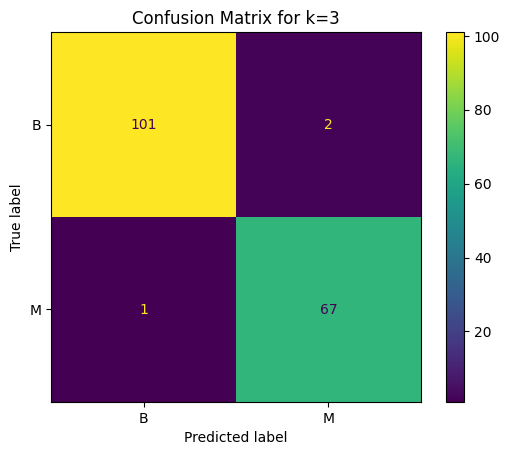

In [69]:
# Use the chosen k-value for the model. Evaluate and present confusion matrix and metrics (accuracy, precision, recall).
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['B', 'M'])
cmd.plot()
plt.title('Confusion Matrix for k=3')
plt.show()

In [70]:
# ..and metrics (accuracy, precision, recall) using predictions from k=3

report = classification_report(y_test, y_pred, target_names=['B', 'M'])
print(report)

              precision    recall  f1-score   support

           B       0.99      0.98      0.99       103
           M       0.97      0.99      0.98        68

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



The confusion matrix shows that 2 benign tumors were misclassified as malignant, 1 malignant tumor was misclassified as benign and giving 67 correctly classified malignant tumors and 101 correctly classified benign tumors. The accuracy score is 0.98, precision for benign tumors is 0.99 and for malignant tumors 0.97. The recall for benign tumors is 0.98 and for malignant tumors 0.99. It is especially important to have high recall for malignant tumors so that as few malignant tumors as possible are misclassified. The downside of high recall is that it might cause false positives pointing benign tumors as malignant, but in this case the precision is also high and the number of false positive is low. Overall, the model seems to perform well and identifies the tumors with high accuracy. 

The model meets the business requirements as it has high accuracy, precision and recall which are necessary for a medical application like this. Further testing with new data would further validate the model´s performance before using it in real applications.

## 6. Deployment

Medical applications are highly regulated and require extensive testing and validation before they can be introduced in practice. This model does meet the requirements for accuracy, precision and recall but to use it in practice would require to first research the regulatory requirements for such a system. It would probably require further testing with new data and validation of the performance. 

If the model would be used in practice, it could be used as a supporting tool for medical professionals to assit in the diagnosis of breast cancer. The input features should be calculated from the images of FNAs and fed to the model which would then provide the classification of the tumor. The model could be integrated into existing medical software systems. The results should be communicated clearly indicating the predicted class along with the associated probabilities to help medical professionals understand why the model made a certain prediction. The model should only be used as a supporting tool and not as a diagnostic tool as diagnostic tools require to be trained and tested with more than one dataset. 

The whole system would need to be validated before use and regularly monitored to ensure its continued accuracy and precision. For further development, the model could be trained and tested with more datasets. 